In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
# import stanford_mir; stanford_mir.init()
from ipywidgets import interact

[&larr; Back to Index](index.html)

# Beat Tracking

## `librosa.beat.beat_track`

Load an audio file:

In [3]:
x, sr = librosa.load('audio/58BPM.wav')
ipd.Audio(x, rate=sr)

Use [`librosa.beat.beat_track`](http://bmcfee.github.io/librosa/generated/librosa.beat.beat_track.html#librosa.beat.beat_track) to estimate the beat locations and the global tempo:

In [5]:
tempo, beat_times = librosa.beat.beat_track(x, sr=sr, start_bpm=60, units='time')
print(tempo)
print(beat_times)

58.72691761363637
[1.06811791 2.11301587 3.11147392 4.17959184 5.20126984 6.2461678
 7.2678458 ]


Plot the beat locations over the waveform:

(-1, 1)

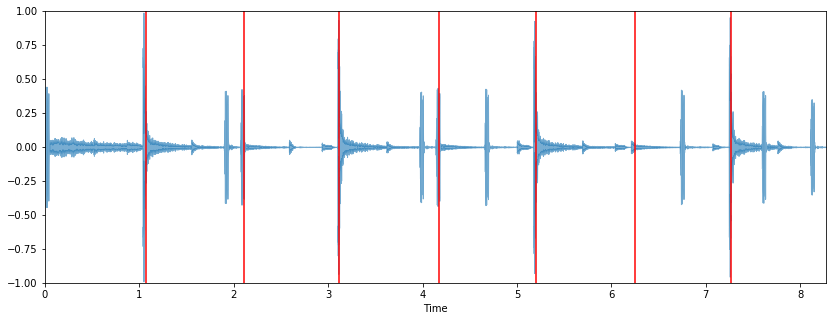

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)

Plot a histogram of the intervals between adjacent beats:

Text(0,0.5,'Count')

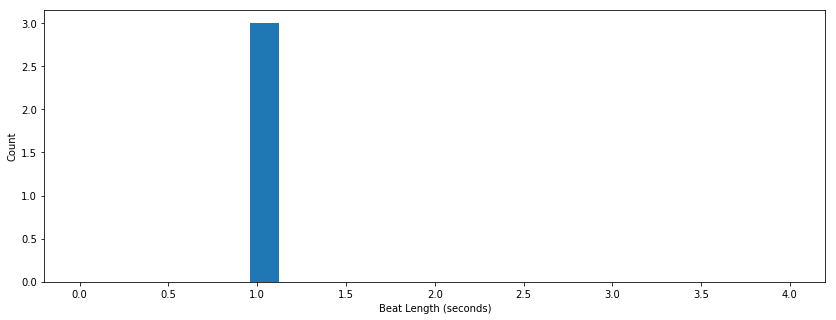

In [7]:
beat_times_diff = numpy.diff(beat_times)
plt.figure(figsize=(14, 5))
plt.hist(beat_times_diff, bins=50, range=(0,4))
plt.xlabel('Beat Length (seconds)')
plt.ylabel('Count')

Visually, it's difficult to tell how correct the estimated beats are. Let's listen to a click track:

In [9]:
clicks = librosa.clicks(beat_times, sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

Use the IPython interactive widgets to observe how the output changes as we vary the parameters of the beat tracker.

In [12]:
def f(start_bpm, tightness_exp):
    return librosa.beat.beat_track(x, sr=sr, start_bpm=start_bpm, tightness=10**tightness_exp, units='time')
interact(f, start_bpm=60, tightness_exp=2)

interactive(children=(IntSlider(value=60, description='start_bpm', max=180, min=-60), IntSlider(value=2, descr…

<function __main__.f(start_bpm, tightness_exp)>

## Questions

Try other audio files:

In [8]:
ls audio

125_bounce.wav                  jangle_pop.mp3
58bpm.wav                       latin_groove.mp3
README.md                       oboe_c6.wav
brahms_hungarian_dance_5.mp3    prelude_cmaj.wav
busta_rhymes_hits_for_days.mp3  simple_loop.wav
c_strum.wav                     simple_piano.wav
clarinet_c6.wav                 sir_duke_piano_fast.mp3
classic_rock_beat.wav           sir_duke_piano_slow.mp3
conga_groove.wav                sir_duke_trumpet_fast.mp3
drum_samples/                   sir_duke_trumpet_slow.mp3
funk_groove.mp3                 tone_440.wav


[&larr; Back to Index](index.html)